In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

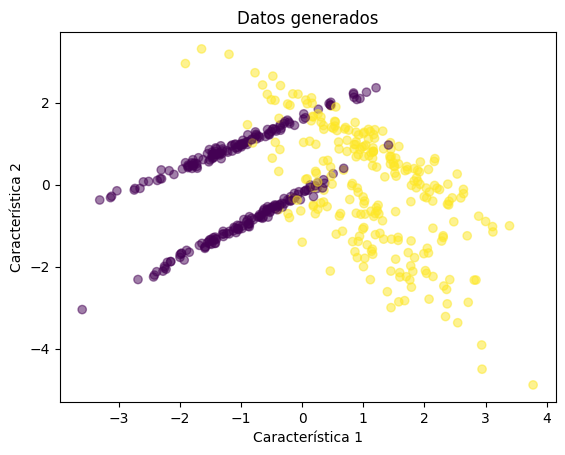

In [2]:
# Crear dataset sintético
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis",alpha=0.5)
plt.title("Datos generados")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [3]:
def linear(w,x,b):
    """
    Calcula la combinación afín de las entradas.
    """ 
    value= w.T@x+b
    return value


def sigmoid(z):
    value= 1/(1+np.exp(-z))
    return value

In [5]:
def loss_function(y,y_pred):
    m=y.shape[0]
    value= -(1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred)) 
    return value

In [6]:
def gradient_descent(w,b,X_train,y_train,alpha,num_iterations):

    """
    Implementa el descenso del gradiente para minimizar la función de costo.
    Implementa el algoritmo de descenso del gradiente para optimizar los parámetros w y b
    del modelo de regresión logística.
    Para cada iteración se calcula el costo y se actualizan los parámetros.

    Args:
        w (numpy.ndarray): Vector de pesos inicial
        b (float): Término de sesgo inicial 
        X_train (numpy.ndarray): Matriz de características de entrenamiento
        y_train (numpy.ndarray): Vector de etiquetas de entrenamiento
        alpha (float): Tasa de aprendizaje
        num_iterations (int): Número de iteraciones del algoritmo

    Returns:
        tuple: Una tupla que contiene:
            - w (numpy.ndarray): Vector de pesos optimizado
            - b (float): Término de sesgo optimizado
            - costs (list): Lista con el valor de la función de costo en cada iteración
    """
    m = X_train.shape[0]  # número de ejemplos de entrenamiento
    costs = []  # lista para almacenar los costos
    
    for i in range(num_iterations):
        # Cálculo del forward pass
        z = np.dot(X_train, w) + b
        a = sigmoid(z)  # función sigmoide
        
        # Cálculo del costo
        cost = -(1/m) * np.sum(y_train * np.log(a) + (1 - y_train) * np.log(1 - a))
        costs.append(cost)
        
        # Cálculo de los gradientes
        dz = a - y_train
        dw = (1/m) * np.dot(X_train.T, dz)
        db = (1/m) * np.sum(dz)
        
        # Actualización de parámetros
        w = w - alpha * dw
        b = b - alpha * db
        
    return w, b, costs

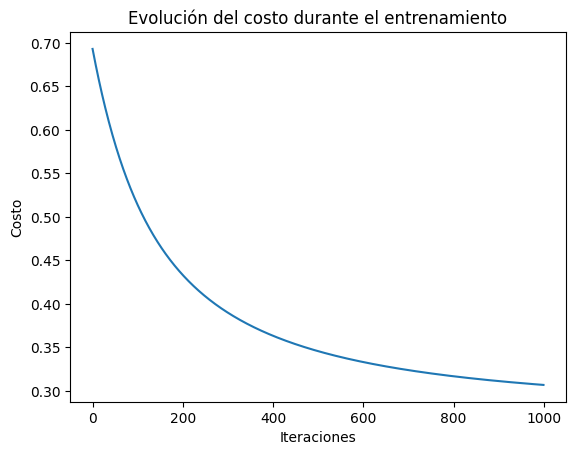

Parámetros optimizados:
w = [1.62634053 0.18266456]
b = -0.02761975892214229


In [7]:
# Inicializar parámetros
n_features = X_train.shape[1]  # número de características
w = np.zeros(n_features)       # inicializar pesos en cero
b = 0                         # inicializar sesgo en cero

# Hiperparámetros
alpha = 0.01                  # tasa de aprendizaje
num_iterations = 1000         # número de iteraciones

# Entrenar el modelo usando descenso del gradiente
w_trained, b_trained, costs = gradient_descent(w, b, X_train, y_train, alpha, num_iterations)

# Graficar la evolución del costo
plt.plot(costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución del costo durante el entrenamiento')
plt.show()

# Imprimir los parámetros optimizados
print("Parámetros optimizados:")
print(f"w = {w_trained}")
print(f"b = {b_trained}")

In [8]:
# Código para hacer predicciones

def predict(w, b, X):
    """
    Realiza predicciones sobre nuevos ejemplos.
    Implementa el cálculo de la predicción para nuevos ejemplos a partir de los
    parámetros optimizados del modelo de regresión logística.

    Args:
        w (numpy.ndarray): Vector de pesos optimizado
        b (float): Término de sesgo optimizado
        X (numpy.ndarray): Matriz de características de los ejemplos a predecir

    Returns:
        numpy.ndarray: Vector de etiquetas predichas
    """
    z = np.dot(X, w) + b
    a = sigmoid(z)
    y_pred = np.round(a)
    return y_pred

# Realizar predicciones sobre los datos de prueba
y_pred = predict(w_trained, b_trained, X_test)
y_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.])

Métricas de evaluación:
Exactitud: 0.88
Precisión: 0.8518518518518519
Sensibilidad: 0.92
Especificidad: 0.84


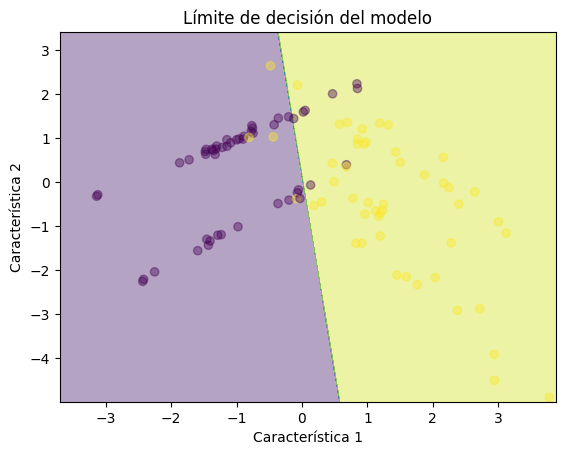

In [9]:
# Calcular métricas de evaluación

VP = np.sum((y_test == 1) & (y_pred == 1))
VN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

exactitud = (VP + VN) / len(y_test)
precision = VP / (VP + FP)
sensibilidad = VP / (VP + FN)
especificidad = VN / (VN + FP)

print("Métricas de evaluación:")
print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")

# Visualizar el límite de decisión
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_grid = predict(w_trained, b_trained, X_grid)
y_grid = y_grid.reshape(xx.shape)

plt.contourf(xx, yy, y_grid, alpha=0.4, cmap="viridis")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", alpha=0.4)
plt.title("Límite de decisión del modelo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

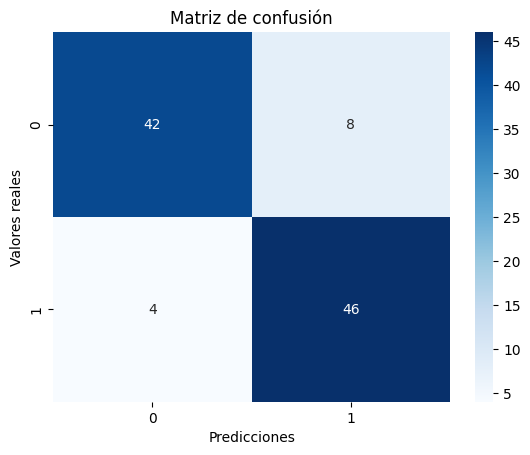

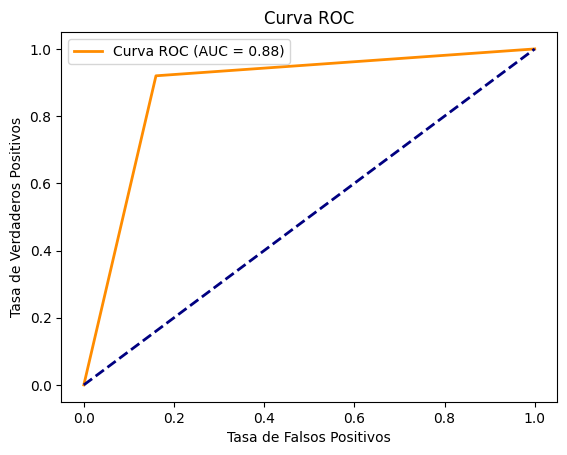

In [10]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")
plt.show()

# Calcular el área bajo la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()